In [1]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy,binary_crossentropy,mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils.np_utils import to_categorical

참고: 동물들 이미지 분류하기<br>
https://codetorial.net/tensorflow/classifying_the_horse_and_human.html

In [2]:
#동물들 데이터셋 경로 지정
cane_dir = 'C:/bigdata/test_animal/archive/p_img/cane'
cavallo_dir = 'C:/bigdata/test_animal/archive/p_img/cavallo'
elefante_dir = 'C:/bigdata/test_animal/archive/p_img/elefante'
farfalla_dir = 'C:/bigdata/test_animal/archive/p_img/farfalla'
gallina_dir = 'C:/bigdata/test_animal/archive/p_img/gallina'
gatto_dir = 'C:/bigdata/test_animal/archive/p_img/gatto'
mucca_dir = 'C:/bigdata/test_animal/archive/p_img/mucca'
pecora_dir = 'C:/bigdata/test_animal/archive/p_img/pecora'
ragno_dir = 'C:/bigdata/test_animal/archive/p_img/ragno'
scoiattolo_dir = 'C:/bigdata/test_animal/archive/p_img/scoiattolo'

In [3]:
#동물별 파일 이름 리스트
cane_names = os.listdir(cane_dir)
cavallo_names = os.listdir(cavallo_dir)
elefante_names = os.listdir(elefante_dir)
farfalla_names = os.listdir(farfalla_dir)
gallina_names = os.listdir(gallina_dir)
gatto_names = os.listdir(gatto_dir)
mucca_names = os.listdir(mucca_dir)
pecora_names = os.listdir(pecora_dir)
ragno_names = os.listdir(ragno_dir)
scoiattolo_names = os.listdir(scoiattolo_dir)

print(cane_names[:10])

['OIF-e2bexWrojgtQnAPPcUfOWQ.jpg', 'OIP---A27bIBcUgX1qkbpZOPswHaFS.jpg', 'OIP---cByAiEbIxIAleGo9AqOQAAAA.jpg', 'OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpg', 'OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpg', 'OIP---_cJbI6Ei26w5bW1urHewHaCf.jpg', 'OIP--0C2kq6I68beB3DduLoxMgHaEf.jpg', 'OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpg', 'OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpg', 'OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpg']


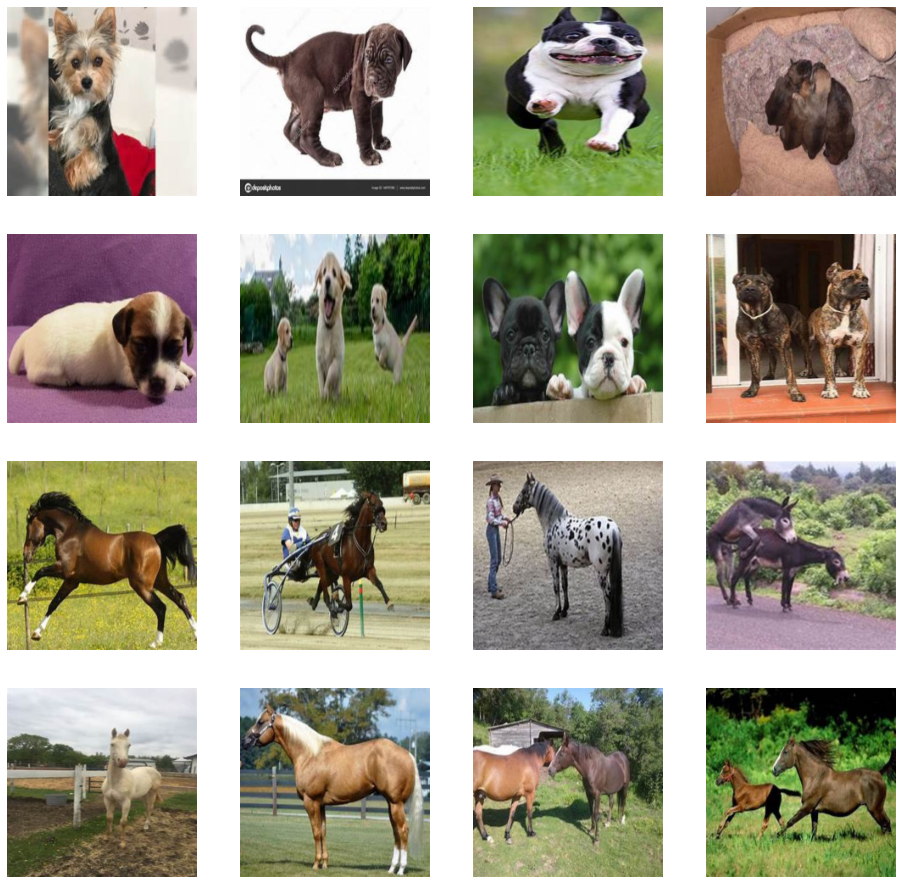

In [4]:
# 이미지 확인하기
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cane_pix = [os.path.join(cane_dir, fname) for fname in cane_names[pic_index-8:pic_index]]
next_cavallo_pix = [os.path.join(cavallo_dir, fname) for fname in cavallo_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cane_pix + next_cavallo_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    
    # 1st Layer (Convolution Layer)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=1, padding='same'),
    # 2nd Layer (Convolution Layer)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    # 3rd Layer (Convolution Layer)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', strides=1, padding='same'),
    # 4th Layer (Convolution Layer)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    # 5th Layer (Convolution Layer)
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', strides=1, padding='same'),
    # 6th Layer (Convolution Layer)
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', strides=1, padding='same'),
    # 7th Layer (Convolution Layer)
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    # 8th Layer (Convolution Layer)
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    # 9th Layer (Convolution Layer)
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', strides=1, padding='same'),
    # 10th Layer
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    # 11th Layer
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', strides=1, padding='same'),
    # 12th Layer
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', strides=1, padding='same'),
    # 13th Layer
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', strides=1, padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    # 14th Layer (Fully Connected Layer)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4906, activation='relu'),
    # 15th Layer (Fully Connected Layer)
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4096, activation='relu'),
    # 16th Layer (Fully Connected Layer)
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [6]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics='accuracy')
ck_p = ModelCheckpoint('best_model.h5')
es=EarlyStopping(patience=8, restore_best_weights=True)

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split=0.1) #validation 설정

train_generator = train_datagen.flow_from_directory(
    'C:/bigdata/test_animal/archive/p_img',
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
    seed=42,
    color_mode='rgb',
    subset='training' # training 데이터
)

validation_generator = train_datagen.flow_from_directory(
    'C:/bigdata/test_animal/archive/p_img',
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
    seed=42,
    color_mode='rgb',
    subset='validation' # validation 데이터
)

Found 23565 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data = validation_generator,
    verbose=1,
    callbacks=[ck_p,es])

Epoch 1/100
